
# ARIMA and Seasonal ARIMA



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.tail()

,Month,sales
103,1972-08,1413
104,1972-09,5877
105,1972-10,5879
106,1972-11,5879
107,1972-12,5879


In [5]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [6]:
df.tail()

,Month,Sales
103,1972-08,1413
104,1972-09,5877
105,1972-10,5879
106,1972-11,5879
107,1972-12,5879


In [7]:
df.tail()

,Month,Sales
103,1972-08,1413
104,1972-09,5877
105,1972-10,5879
106,1972-11,5879
107,1972-12,5879


In [8]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [9]:
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [10]:
df.set_index('Month',inplace=True)

In [11]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [12]:
df.describe()

,Sales
count,108.000000
mean,4792.203704
std,2524.207424
min,1413.000000
25%,3149.750000
50%,4281.000000
75%,5327.750000
max,13916.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Month'>

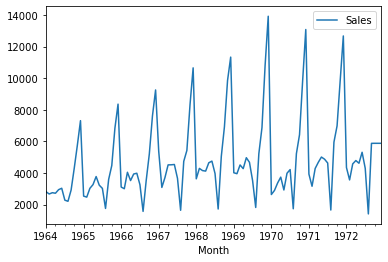

In [13]:
df.plot()

In [14]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [15]:
test_result=adfuller(df['Sales'])

In [16]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [17]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8006679101287235
p-value : 0.3801301452222125
#Lags Used : 12
Number of Observations Used : 95
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [18]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [19]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-08-01    4298.0
1972-09-01    1413.0
1972-10-01    5877.0
1972-11-01    5879.0
1972-12-01    5879.0
Name: Sales, Length: 108, dtype: float64

In [20]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [21]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [22]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.03732113168186
p-value : 0.03155303294667527
#Lags Used : 0
Number of Observations Used : 95
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

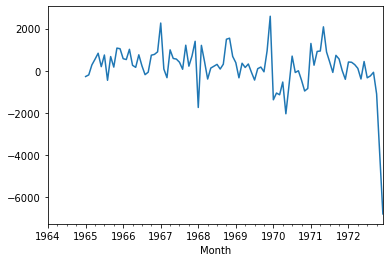

In [23]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
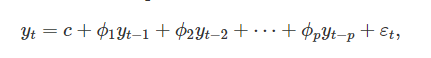

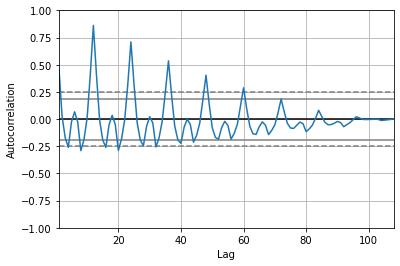

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [26]:
import warnings
warnings.filterwarnings('ignore')

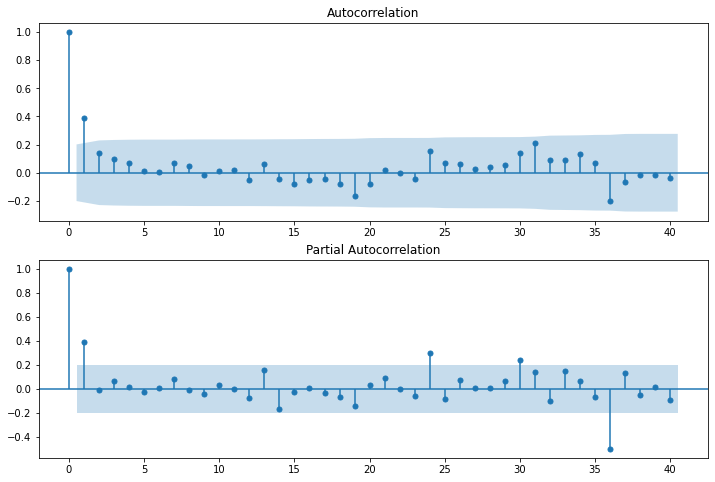

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [28]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [29]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -977.002
Method:                       css-mle   S.D. of innovations           2195.840
Date:                Thu, 30 Dec 2021   AIC                           1962.004
Time:                        12:24:17   BIC                           1972.695
Sample:                    02-01-1964   HQIC                          1966.338
                         - 12-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.6032     11.726      1.928      0.054      -0.380      45.586
ar.L1.D.Sales     0.4341      0.088      4.933      0.000       0.262       0.607
ma.L1.D.Sales    -1.0000      0.025    -39.632      0.000      -1.049      -0.951
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3036           +0.0000j            2.3036            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

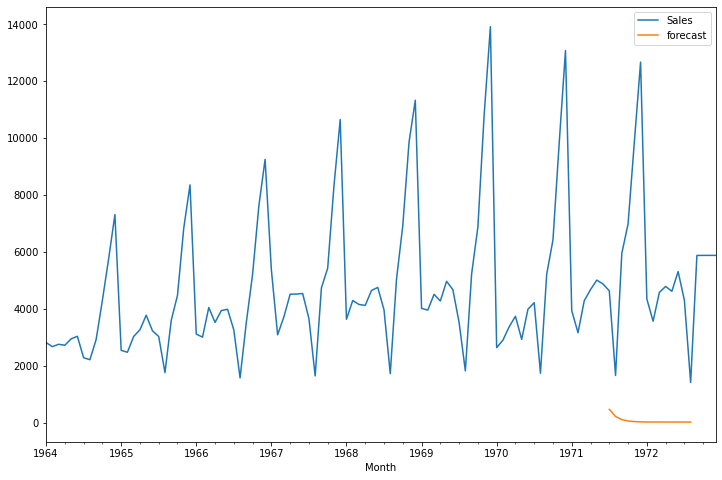

In [31]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [32]:
import statsmodels.api as sm

In [33]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()


<AxesSubplot:xlabel='Month'>

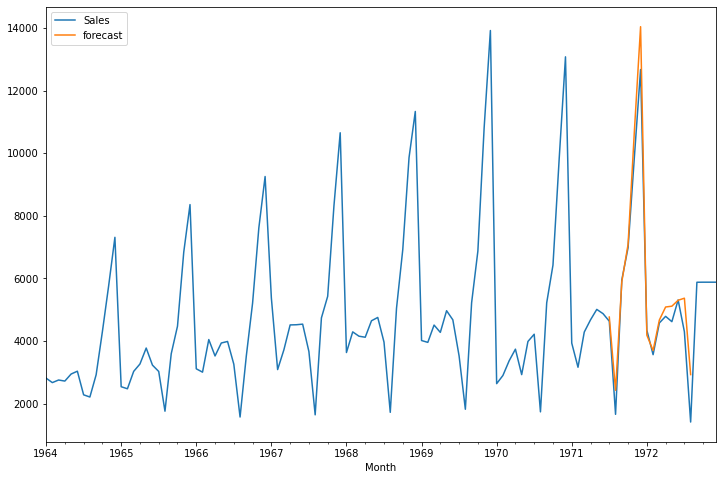

In [34]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,23)]

In [36]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [37]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN
1974-09-01,NaN,NaN,NaN,NaN
1974-10-01,NaN,NaN,NaN,NaN


In [38]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

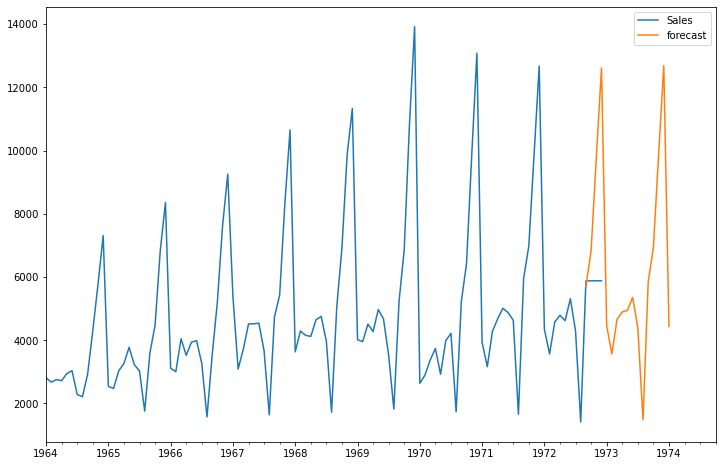

In [39]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [40]:
future_df[['Sales', 'forecast']].tail(27)

future_df.forecast.dropna()


1972-09-01     5701.536632
1972-10-01     6831.995195
1972-11-01     9759.641786
1972-12-01    12609.446117
1973-01-01     4461.542469
1973-02-01     3562.804146
1973-03-01     4662.334082
1973-04-01     4894.268586
1973-05-01     4945.756108
1973-06-01     5355.284873
1973-07-01     4389.772518
1973-08-01     1485.522836
1973-09-01     5835.890226
1973-10-01     6936.113070
1973-11-01     9844.579684
1973-12-01    12683.817444
1974-01-01     4434.459613
Name: forecast, dtype: float64

In [41]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rmse = np.sqrt(mean_squared_error("Sales","forecast"))
# print('Test RMSE: %.3f' % rmse)